# **Esame del 16 febbraio 2024**

- Non si possono consultare libri, note, ed ogni altro materiale o persone durante
l'esame ad eccezione delle funzioni Python fornite.

- Risolvere gli esercizi marcati con **[P]** all'interno dell'IPython notebook.

- Svolgere gli esercizi marcati con **[T]** su fogli protocollo, indicando: nome, cognome, codice persona e data

- La durata del compito è di 90 minuti.

- Questo esame è composto da 3 esercizi, per un totale di 30/30 punti.

- All'interno degli script **functions2024.py** e **fem.py** trovate le funzioni necessarie per gli esercizi (che potete quindi importare ed utilizzare liberamente).


In [ ]:
# Cella di inizializzazione. Eseguirla prima di iniziare lo svolgimento dell'esame (ed, eventualmente, ad ogni riavvio).
import matplotlib.pyplot as plt
import numpy as np
from fem import install

install()

## **Esercizio 1** &nbsp; &nbsp; <small>(10 punti)</small>

Si consideri la seguente matrice

$$A=\left[\begin{array}{ccccc}1&1&1&1&1\\ 1&2&3&4&5\\ 1& 3&6&10&15 \\ 1&4&10&20&35\\ 1&5&15&35&70\end{array}\right]$$

che si può costruire con il comando scipy.linalg.pascal(n), dove n è la dimensione della matrice.

##### **a) [P+T]** &nbsp; &nbsp; (3 punti)

Enunciare la condizione necessaria e sufficiente per l'esistenza e unicità della fattorizzazione LU e verificare (con opportuni comandi) che è soddisfatta per la matrice $A$ di dimensione $n = 5$.

*Soluzione [T].*

Data una matrice $A\in \mathbb{R}^{n\times n}$ non singolare la fattorizzazione LU
esiste ed è unica se e solo se tutte le sotto-matrici principali $A_i$ di ordine $i = 1 \ldots n - 1$ sono non singolari.

*Soluzione [P].*

In [ ]:
from scipy.linalg import pascal, det

n = 5
A = pascal(n)

existence = True
for i in range(1,n+1):
    if (det(A[0:i, 0:i])==0):
        existence = False
if (existence):
    print("La fattorizzazione esiste")

La fattorizzazione esiste


Se all'interno del ciclo for viene trovato anche un solo determinante nullo la condizione per l'esistenza viene resa falsa.

##### **b) [P]** &nbsp; &nbsp; (3 punti)

 Data la soluzione esatta $\mathbf{x} = [1, 1 . . . , 1]^T$ costruire il termine noto $\mathbf{b}$
e risolvere il sistema lineare $A\mathbf{x} = \mathbf{b}$ utilizzando
la fattorizzazione LU seguita dai metodi di sostituzione in avanti e all'indietro (si sfruttino le funzioni fornite). Verificare se è stato effettuato il pivoting.

*Soluzione*

In [ ]:
from functions2024 import fwsub, bksub
from scipy.linalg import lu

x_ex = np.ones(n) # soluzione esatta
b = A @ x_ex      # costruzione del termine noto b come b = Ax

P, L, U = lu(A)

I = np.eye(n) # matrice identità
if (np.all(np.abs(P-I)==0)):
    print("Pivoting non effettuato")
else:
    print("Pivoting effettuato")

y = fwsub(L, P.T @ b)
x = bksub(U, y)

Pivoting effettuato


Notiamo che il pivolting è stato effettuato perché la matrice di pivoting è diversa dall'identità.

##### **c) [P]** &nbsp; &nbsp; (3 punti)

Ripetere i passaggi al punto precedente per matrici di dimensione $n = 10$, $15$ e $20$. Per ognuno dei casi calcolare la norma dell'errore relativo e il condizionamento della matrice e rappresentarli su due grafici in scala logaritmica. Commentare i risultati alla luce della teoria.

*Soluzione*

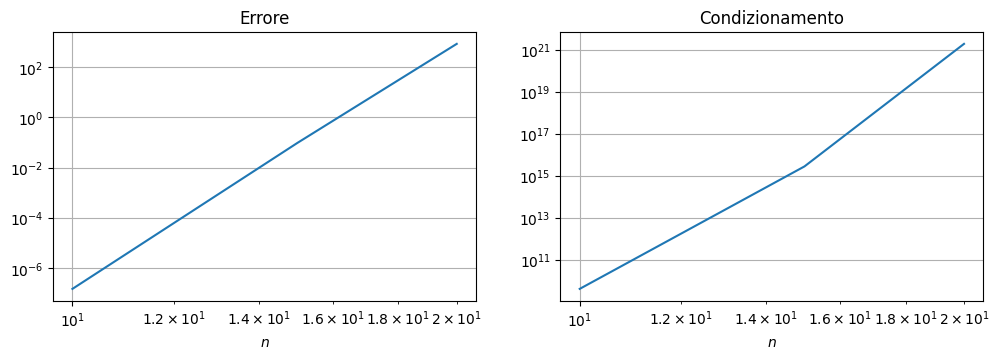

In [ ]:
err = []
cond = []
for n in [10, 15, 20]:
    A = pascal(n)
    x_ex = np.ones(n)
    b = A @ x_ex
    P, L, U = lu(A)
    y = fwsub(L, P.T @ b)
    x = bksub(U, y)
    err.append(np.linalg.norm(x-x_ex)/np.linalg.norm(x_ex))
    cond.append(np.linalg.cond(A))

plt.figure(figsize = (12, 3.5))
plt.subplot(1, 2, 1)
plt.loglog([10, 15, 20], err)
plt.xlabel("$n$")
plt.grid()
plt.title("Errore")
plt.subplot(1, 2, 2)
plt.loglog([10, 15, 20], cond)
plt.grid()
plt.xlabel("$n$")
plt.title("Condizionamento")
plt.show()

Dal grafico ottenuto osserviamo che per matrici di dimensioni maggiori l'errore cresce fino a superare il 100% e questo si spiega con l'aumento del numero di condizionamento della matrice $K(A) > 10^{20}$ . Non è quindi garantito che gli errori di arrotondamento commessi durante la fattorizzazione e il calcolo della soluzione si mantengano bassi, infatti in questo caso sono amplificati inquinando la soluzione numerica.

## **Esercizio 2** &nbsp; &nbsp; <small>(10 punti)</small>

Si consideri il seguente integrale

$$I=\displaystyle \int_a^b f(x) dx$$

con $f(x)=\dfrac{1}{\sqrt{x^2-1}}$, sapendo che la primitiva dell'integranda è data da
$$F(x) = |x+\sqrt{x^2-1}|+c.$$

##### **a) [T]** &nbsp; &nbsp; (4 punti)

Introdurre il metodo di quadratura del punto medio e di Simpson e la loro versione composita. Qual è l'ordine di accuratezza per tali metodi? E il loro grado di esattezza?

*Soluzione*  

Per la formula del punto medio l'integrale viene approssimato da

\begin{gather*}
    I \approx I_{pm} = (b-a) f\left(m\right)
\end{gather*}

dove $m$ denota il punto medio dell'intervallo di integrazione $[a, b]$, dato da
$m = 0.5(a+b)$,
l'errore
per la formula del punto medio è dato da

\begin{gather*}
    |E_{pm}|\leq \frac{(b-a)^3}{24}  \max_{x \in I} |f^{\prime\prime}(x)|.
\end{gather*}

La formula di Simpson, in cui approssimiamo $I$ utilizzando il valore della funzione in tre punti, è
data da

\begin{gather*}
    I \approx I_s = \frac{b-a}{6} \left[ f(a) + 4 f\left( m \right) +
        f(b) \right],
\end{gather*}

dove $m = 0.5 (a+b)$, il cui errore è dato da

\begin{gather*}
    |E_s|\leq \frac{(b-a)^5}{16\cdot 180} \max_{x\in[a,b]} |f^{(iv)} (x)|.
\end{gather*}

Nell'integrazione composita suddividiamo l'intervallo $[a,b]$ in $n$ sotto-intervalli, dove, per
$i=1,\ldots,n$, ogni intervallo è dato da $I_i = [x_{i-1}, x_i]$ con $x_i = a+ iH$ e dove $H=(b-a)/n$. Otteniamo così la formula del punto medio composito in cui il valore
dell'integrale è calcolato come

\begin{gather*}
    I_{pm}^c = H \sum_{i=1}^n f\left(\frac{x_{i-1} + x_i}{2}\right).
\end{gather*}

e la formula di Simpson composita risulta data da

\begin{gather*}
    I_s^c = \frac{H}{6} \sum_{i=1}^n \left[ f(x_{i-1}) + 4 f\left( \frac{x_{i-1}
            + x_i}{2}\right) + f(x_i)\right].
\end{gather*}

L'errore del punto medio
composito è dato da $|E_{pm}^c| \leq c H^2$ e per Simpson abbiamo
$|E_s^c| \leq c H^4$. L'ordine di accuratezza per il punto medio è pari a
2 mentre per Simpson pari a 4, mentre il grado di esattezza è pari a 1 e 3
rispettivamente.

##### **b) [P+T]** &nbsp; &nbsp; (4 punti)

Usando le funzioni pmedcomp e simpcomp calcolare un'approssimazione di $I$ considerando l'intervallo di integrazione compreso fra $a = 1.02$ e $b = 2$, e suddividendolo in $N = [10, 20, 40, 80]$ sotto-intervalli. Calcolare l'errore ottenuto e rappresentarlo in scala logaritmica. Commentare i risultati ottenuti alla luce della teoria.

*Soluzione*

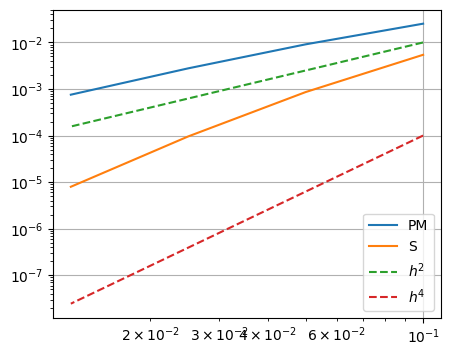

In [ ]:
from functions2024 import pmedcomp, simpcomp

f = lambda x: 1/(x*x-1)**0.5
F = lambda x: np.log(np.abs(x + (x*x-1)**0.5))
a = 1.02
b = 2
I_ex = F(b)-F(a)

N = np.array([10, 20, 40, 80])

errPM = []
errS = []

for n in N:
    Ipm = pmedcomp(f, a, b, n)
    Is =  simpcomp(f, a, b, n)
    errPM.append(np.abs(Ipm - I_ex))
    errS.append(np.abs(Is - I_ex))

plt.figure(figsize = (5, 4))
plt.loglog(1./N, errPM, label = "PM")
plt.loglog(1./N, errS, label = "S")
plt.loglog(1./N, 1./(N*N), '--', label = "$h^2$")
plt.loglog(1./N, 1./(N**4), '--', label = "$h^4$")
plt.grid()
plt.legend()
plt.show()

Possiamo osservare che, come previsto dalla teoria, l'errore decresce quadraticamente con il metodo del punto medio, e con ordine 4 nel caso del metodo di Simpson.

##### **c) [P+T]** &nbsp; &nbsp; (2 punti)

Rappresentare graficamente l'integranda $f(x)$ nell'intervallo indicato, e proporre una strategia per la scomposizione dell'intervallo di integrazione in modo da aumentare l'accuratezza mantenendo lo stesso numero di divisioni.

*Soluzione*

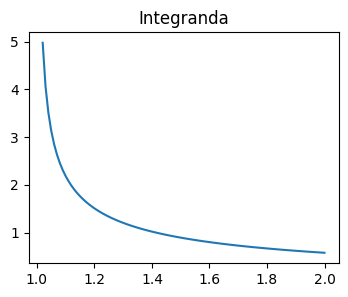

In [ ]:
xplot = np.linspace(a, b, 100)
plt.figure(figsize = (4, 3))
plt.plot(xplot, f(xplot))
plt.title("Integranda")
plt.show()

Notiamo che in prossimità dell'estremo $a = 1.02$ la funzione ha una derivata molto alta (in valore assoluto). Una possibile strategia potrebbe essere quella di applicare l'integrazione composita con una risoluzione diversa nella parte sinistra del dominio, oppure addirittura di adattare l’ampiezza degli intervalli di
integrazione in modo continuo per riflettere l'andamento della soluzione. Implementiamo la prima, più semplice, soluzione.

In [ ]:
Ipm1 = pmedcomp(f, a, 1.2, 40)
Ipm2 = pmedcomp(f, 1.2, b, 40)
err_adattivo = np.abs(Ipm1 + Ipm2 - I_ex)
print("Errore con 80 intervalli uguali", errPM[3])
print("Errore con 80 intervalli (adattivo)", err_adattivo)

Errore con 80 intervalli uguali 0.0007547505328195925
Errore con 80 intervalli (adattivo) 0.00016398068940004507


Consideriamo il caso di $N = 80$ intervalli, in cui il metodo del punto medio fornisce un errore pari a 0.00075. Calcoliamo $I = I_1 + I_2$ dove $I_1$ è l'integrale approssimato nell'intervallo $(1.02, 1.2)$ e $I_2$ nell'intervallo $(1.2, 2)$. Usiamo $N_1 = 40$ intervalli per il calcolo di $I_1$, e $N_2 = 40$ per $I_2$
Otteniamo un errore pari a 1.6398e-04 con lo stesso numero di intervalli.

## **Esercizio 3** &nbsp; &nbsp; <small>(10 punti)</small>

Si consideri il seguente problema

\begin{gather*}
    \begin{cases}
        -u^{\prime\prime} = f(x) & 0< x< 1, \\
        u(0)=0                              \\
        u^\prime(1)= 4e^2
    \end{cases}
\end{gather*}

##### **a) [T]** &nbsp; &nbsp; (1 punto)

Determinare $f$ tale per cui $u(x) = e^{2x}x^2$ è soluzione esatta del problema e verificare che tale soluzione effettivamente rispetta le condizioni al bordo.

*Soluzione*

Calcoliamo le derivate della funzione $u$ fornita:

$$u' (x) = 2e^{2x} x^2 + 2e^{2x} x$$

$$u'' (x) = 4e^{2x} x^2 + 4e^{2x} x + 2e^{2x} + 4e^{2x} x = 2e^{2x} (2x^2 + 4x + 1).$$

Verifichiamo inoltre che la soluzione esatta fornita soddisfa le condizioni al bordo $u(0) = 0$ e $u' (1) = 4e^2$ quindi effettivamente $u$ è soluzione dell’equazione fornita dove $f (x) = −2e^{2x} (2x^2 + 4x + 1)$.

##### **b) [T]** &nbsp; &nbsp; (4 punti)

Introdurre brevemente l'approssimazione del problema con il metodo
degli elementi finiti in spazio e derivarne l'espressione matriciale considerando le condizioni al contorno del problema in esame.

*Soluzione*  

Dato che abbiamo una condizione di Dirichlet nel bordo sinistro, in $x=0$, consideriamo lo spazio funzionale $V= \left\{ v \in H^1(\Omega): \, v(0) = 0 \right\}$
e prendiamo delle funzioni test $v \in V$; la forma
debole del problema è: trovare $u(x) \in V$ tale che
\begin{gather*}
    a(u,v) = F(v) \qquad
    \forall v \in V.
\end{gather*}
dove $a(u,v)=\int_0^1 u^\prime v^\prime dx$ e $F(v)=\int_0^1 f v - g v(1)$.
Nel nostro caso $f= -2e^{2x}(2x^2+4x+1)$ e $g=4e^2$. Notiamo che il termine di
bordo è nullo sul bordo sinistro mentre la condizione di Neumann sul bordo
destro è inclusa nel funzionale.
La formulazione discreta del problema è ottenuta scegliendo un
sotto-spazio finito dimensionale  $V_h \subset V$ per cui possiamo
considerare una base $\{\phi_j\}_j$ per $V_h$ di funzioni linearmente
indipendenti. Nel nostro caso, data una griglia di $N+2$ nodi in cui
$x_0=0$, $x_{N+1}=1$, e spaziatura $h=\frac{b-a}{N+1}$ la base è formata
dalle funzioni ''a capanna'' $\phi_j$ con $j=1,\ldots N+1$; infatti,
considerando lo sviluppo
\begin{gather*}
    u_h(x) = \sum_{j=1}^{N_h} u_j \phi_j (x)
\end{gather*}
le incognite sono i valori $u_j$ in tutti i nodi eccetto il primo, per un totale di
$N+1$ incognite.
Sfruttando la bi-linearità della forma $a$, il fatto che il dominio non
dipende dal tempo e la linearità del funzionale $F$ otteniamo un sistema di $N+1$
equazioni
\begin{gather*}
    A \mathbf{u}  =  \mathbf{f}
\end{gather*}
dove la matrice di rigidezza $A$
\begin{gather*}
    A \in \mathbb{R}^{N+1 \times N+1}: \quad a_{ij} = a\left(\phi_j,
    \phi_i\right)
\end{gather*}

In particolare otteniamo la seguente struttura:

\begin{gather*}
    A =
    \frac{1}{h}
    \begin{bmatrix}
        2  & -1     & 0  & 0  & 0  & \ldots & 0  \\
        -1 & 2      & -1 & 0  & 0  & \ldots & 0  \\
        0  & -1     & 2  & -1 & 0  & \ldots & 0  \\
        \ldots                                   \\
        0  & \ldots & 0  & 0  & -1 & 2      & -1 \\
        0  & \ldots & 0  & 0  & 0  & -1     & 1
    \end{bmatrix}
\end{gather*}

mentre il termine noto $\mathbf{f}$ contiene, nell'ultima riga, il contributo della condizione di Neumann.

##### **c) [P]** &nbsp; &nbsp; (2 punti)

Si consideri una griglia di ampiezza uniforme $h = 0.1$. Si risolva il
problema con il metodo degli elementi finiti lineari, utilizzando la function dirNeusolve fornita. Si rappresenti in un grafico la soluzione numerica sovrapposta alla soluzione esatta.

In [ ]:
from fem import Line, generate_mesh, FEspace, plot
from fem import dx, ds, deriv, assemble, interpolate, DirichletBC, applyBCs, dof2fun
from scipy.sparse.linalg import spsolve

# Dati del problema
domain = Line(0, 1)
f = lambda x:  -2*np.exp(2*x)*(2*x**2 + 4*x + 1)

def dirNeusolve(alpha, gamma, h):
  """
  Risolve il problema -u'' = f per 0 < x < 1 con condizioni miste Dirichlet-Neumann
  implementando il metodo agli elementi finiti (P1).

  Input:
    alpha    (float)     condizione di Dirichlet sul bordo sinistro, u(0) = alpha.
    gamma    (float)     condizione di Neumann sul bordo destro, u(1) = gamma.
    h        (float)     passo della mesh

  Output:
    u (function di FEniCS).
  """

  mesh = generate_mesh(domain, stepsize = h)
  V = FEspace(mesh, 1)

  fh = interpolate(f, V)
  phi = lambda x: gamma
  phih = interpolate(phi, V)

  def l(v):
    return fh*v*dx + phih*v*ds

  def a(u, v):
    return deriv(u)*deriv(v)*dx

  A = assemble(a, V)
  F = assemble(l, V)

  def isLeftNode(x):
    return x < 1e-12

  dbc = DirichletBC(isLeftNode, alpha)
  A = applyBCs(A, V, dbc)
  F = applyBCs(F, V, dbc)

  u = spsolve(A, F)
  u = dof2fun(u, V)
  return u

In [ ]:
u = dirNeusolve(alpha = 0, gamma = 4*np.exp(2), h = 0.1)

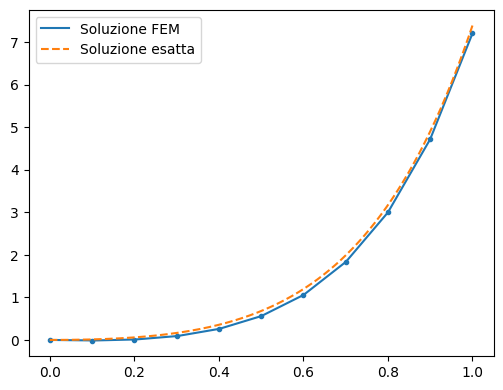

In [ ]:
import matplotlib.pyplot as plt
uex = lambda x:  np.exp(2*x)*x**2
xplot = np.linspace(0, 1, 1000)

plt.figure(figsize = (6, 4.5))
plot(u, label = 'Soluzione FEM', marker = '.')
plt.plot(xplot, uex(xplot), '--', label = 'Soluzione esatta')
plt.legend()
plt.show()

##### **d) [P]** &nbsp; &nbsp; (3 punti)

Si ripeta il calcolo della soluzione numerica al variare
di $h$ con $h =1/N$ , $N = 80, 160, 320$. Calcolare l'errore e rappresentarne l'andamento in scala logaritmica. Commentare il risultato alla luce della teoria.

In [ ]:
from fem import L2error

H = np.array([1/80, 1/160, 1/320])
errors = []
for h in H:
    u = dirNeusolve(alpha = 0, gamma = 4*np.exp(2), h = h)
    errors.append(L2error(uex, u, domain))

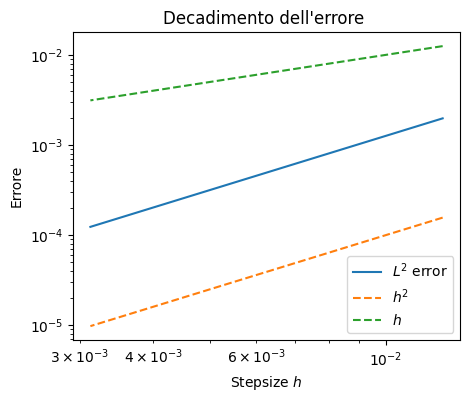

In [ ]:
plt.figure(figsize = (5, 4))
plt.loglog(H, errors , label = '$L^2$ error')
plt.loglog(H, H**2, '--', label = '$h^2$' )
plt.loglog(H, H, '--', label = '$h$' )
plt.legend()
plt.title("Decadimento dell'errore " )
plt.xlabel("Stepsize $h$")
plt.ylabel("Errore")
plt.show()

Notiamo che l’errore diminuisce quadraticamente come previsto dalla teoria.